# Visual Data Analysis in Python,  Part 1

## 1. Dataset

Before we get to the data, let's initialize our environment:

In [1]:
import numpy as np
import pandas as pd

# Ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt

# Seaborn for data visualization
import seaborn as sns
sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

We will be using the customer churn data from a telecom operator to work on data visualization. Here we load in the csv file as a dataframe

In [2]:
df = pd.read_csv('../data/telecom_churn.csv')

To get acquainted with our data, let's look at the first 5 entries using ```head()```:

In [3]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

The last data column, __Churn__, is our target variable. It is binary: _True_ indicates that the company eventually lost this customer, and _False_ indicates that the customer was retained. Later, we will build models that predict this feature based on the remaining features. This is why we call it a _target_.

## 2. Univariate Visualization

_Univariate analysis_ looks at one feature at a time. When we analyze a feature indpendently, we are usually mostly interested in the distribution of its values and ifnore other features in the dataset.

Below, we will consider different statistical types of features and the corresponding tools for their individual visual analysis.

### 2.1 Quantitative Features

_Quantatitve features_ take on ordered numerical values. Those values can be discrete, like integers, or continous, like real numbers, and usually express a count or a measurement.

__Histograms and Density Plots__

The easiest way to take a look at the distribution of a numerical variable is to plot its _histogram_ using the ```DataFrame```'s method ```hist()```:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a176de6d8>,
      dtype=object)

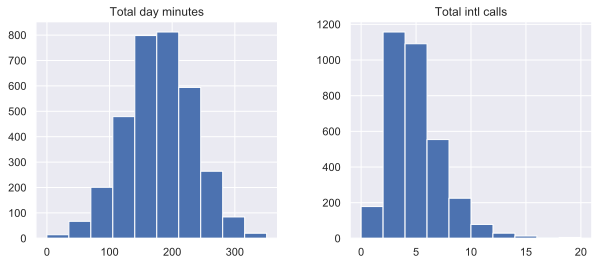

In [7]:
features = ['Total day minutes', 'Total intl calls']
df[features].hist(figsize=(10, 4))

A histogram groups values into bins of equal value range. The shape of the histogram may contain clues about the underlying distribution type: Gaussian, exponential, etc. You can alsonspot any skewness in its shape when the distribution is nearly regular but has some anomalies. Knowing the distribution of the feature values becomes important when you use Machine Learning methods that assume a particular type of it, most often Gaussian.

In the above plot, we see that the variable _Total day minutes_ is normally distributed, while _Total intl calls_ is prominently skewed right (its tail is longer on the the right).

There is also another, often clearer, way to grasp the distribution: _density plots_ or, more formally, _Kernal Density Plots_. They can be considered a smoothed version of the histogram. Their main advantage over the latter is that they do not depend on the size of the bins. Let's create density plots for the same two variables:

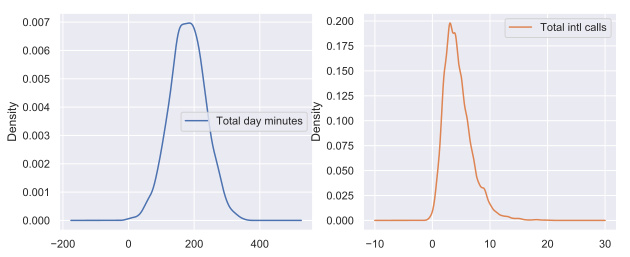

In [11]:
df[features].plot(kind='density', subplots=True, layout=(1, 2), 
                  sharex=False, figsize=(10, 4));

It is also possible to plot a distribution of observations with ```seaborn```'s ```distplot()```. For example, let's look at the distribution of _Total day minutes_. By default, the plot displays bothe histogram with the [kernel density estimate]() (KDE) on top.

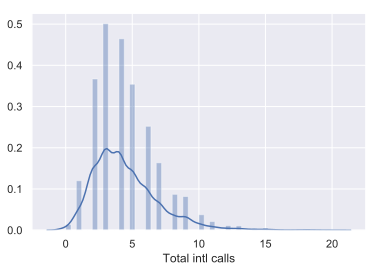

In [12]:
sns.distplot(df['Total intl calls'])

The height of the histogram bars here is normed and shows the density rather than the number of examples in each bin.

__Box Plot__

Another useful type of visualization is a _box plot_. ```seaborn``` does a great job here:

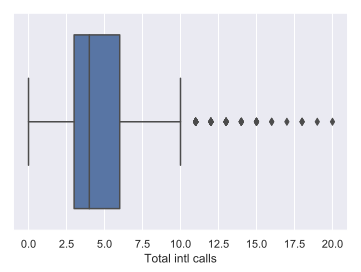

In [13]:
sns.boxplot(x='Total intl calls', data=df)

Let's see how to interpret a box plot. Its components are a _box_ (obviously, this is why its called a box plot), then so-called _whiskers_, and a number of individual points (outliers)

The box by itself illustrates the interquartile spread of the distribution; its length is determined by the 25th(Q1) and 75th(Q3) percentiles. The vertical line inside the box markes the median (50%) of the distribution.

The whiskers are the lines extending from the box. They represent the entire scatte of data points, specifically the points that fall within the interquartile range.

Outliers that fall out of the range bounded by the whiskers are plotted individually as black points along the central axis.

We can see that a large number of international calls is quite rare in our data.

__Violin Plot__

The last type of distribution plots that we will consider is the _violin_ plot.

Look at the figures below. On the left, we see the familiar box plot. To the right, there is a _violin_ plot, with the kernel density estimates on both sides.

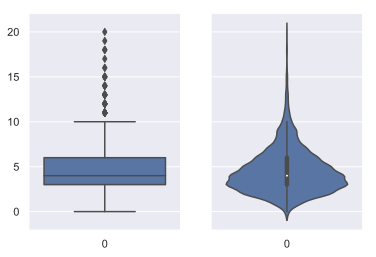

In [14]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df['Total intl calls'], ax=axes[0]);
sns.violinplot(data=df['Total intl calls'], ax=axes[1]);

The difference between the box and and violin plots is that the former illustrates certain statistics considering individual examples in a dataset while the violin plot concentrates more on the smoothed distribution as a whole.

__describe()__

In addition to graphical tools, in order to get the exact numerical statistics of the distribution, we can use the methods ```describe()``` of a ```DataFrame```:

In [15]:
df[features].describe()

,Total day minutes,Total intl calls
count,3333.000000,3333.000000
mean,179.775098,4.479448
std,54.467389,2.461214
min,0.000000,0.000000
25%,143.700000,3.000000
50%,179.400000,4.000000
75%,216.400000,6.000000
max,350.800000,20.000000


It output is mostly self-explanatory. 25%, 50%, and 75% are the corresponding percentiles.

__2.2 Categorical and binary features__

_Categorical features_ take on a fixed number of values. Each of these values assign an observation to a corresponding group, known as a _category_, which reflects some qualitative property of the example. _Binary_ variables are an important scpecial case of categorical variables when the number of possible values is exactly 2. If the values of a categorical variable are ordered, it is called _ordinal_.

__Frequency table__

Let's check the class balance in our dataset by looking at the distribution of the target variable: the _churn rate_. First, we will get a frequency table, which shows how frequent each value of the categorical value is. For this, we will use the ```value_counts()``` method:

In [16]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

By default, the entries in the output are sorted from the most to the least frequently-occuring values.

In our case, the data is not _balanced_; that is, our two target classes, loyal and disployal customers, are not represented equally in the dataset. Only a small part of the clients canceled their subscription to the telecom service. As we will see in the following notebooks, this fact map imply som restrictions on measuring the classification performance, and, in the future, we may want to additionaly penalize our model error in predicting the minority "Churn" class.

__Bar plot__

The bar plot is a graphical representation of the frequency table. The easiest way to create it is to use the ```seaborn``` function, ```countplot()```. There is another function in ```seaborn``` that is somewhat confusingly called ```barplot()``` and is mostly used for representation of some basic stats of a numerical variable grouped by a categorical feature.

Let's plot the distribution for two cateogircal variables:

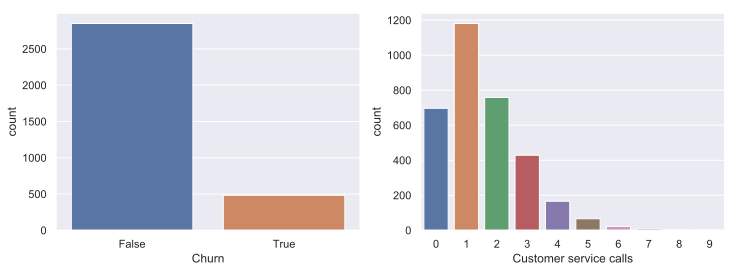

In [18]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x='Churn', data=df, ax=axes[0])
sns.countplot(x='Customer service calls', data=df, ax=axes[1])

The left chart above vividly illustratesthe imbalance in our target variable. The bar plot for _Customer service calls_ on the right gives a hint that the majority of customers resolve their problems in max 2-3 calls. But, as we want to be able to predict the minority class, we may be more interested in how the fewer dissatisfied customers behave. It may well be that the tail of that bar plot contains most of our churn. These are just hypotheses for now, so let's move on to some more interesting and power visual techniques.

### 3. Multivariate Visualization

_Multivariate_ plots allow us to see relationships between two and more different variables, all in one figure. Just as in the case of univariate plots, the specific type of visualization will depend on the types of the variables being analyzed.

__3.1 Quantitative-Quantitative__


__Correlation Matrix__

Lets look at the correlations among the numerical variables in our dataset. This information is important to know as there are Machine Learning algorithms (for example, linear and logistic regression) that do not handle highly correlated input variables well.

First, we will use the method ```corr()``` on a DataFrame that calculates the correlation between each pair of features. Then, we pass the resulting _correlation matrix_ to ```heatmap()``` from ```seabron```, which renders a color-coded matric for the provided values:

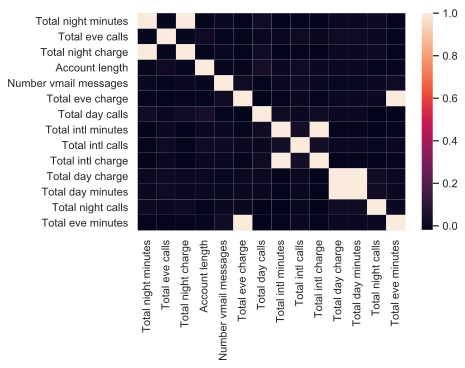

In [19]:
# Drop non-numerical variables
numerical = list(set(df.columns) - 
                set(['State', 'International plan', 'Voice mail plan',
                    'Area code', 'Churn', 'Customer service calls']))

# Calculate and plot
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix);

From the colored correlation matrix, we can see that there are 4 variables such as _Toal day charge_ that have been calculated firectly from the number of minutes spent on phone calls( (_Total day minutes_). These are called _dependent_ variables and can therefore be left out since they do not contribute any additional information. Let's get rid of them:

In [20]:
numerical = list(set(numerical) -
                set(['Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']))

__Scatter Plot__

The scatter plot displays values of two numerical vairables as Cartesian coordinates in 2d space. Scatter plots in 3d are also possible.

Let's try out the function ```scatter()``` from the ```matplotlib``` library:

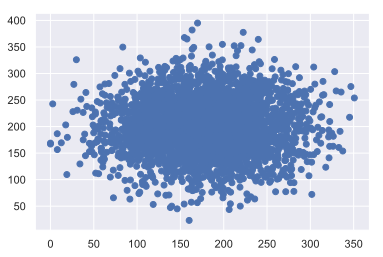

In [22]:
plt.scatter(df['Total day minutes'], df['Total night minutes']);

We get an uninteresting picture of two normally disitrbuted variables. Also, it seems that these features are uncorrelated because the elipse-like shape is aligned with the axes.

There is a slightly fancier option to create a scatter plot with the seaborn library:

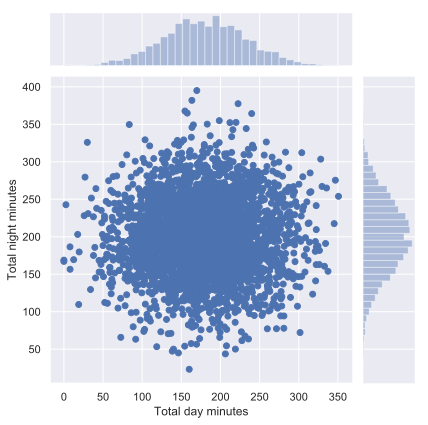

In [23]:
sns.jointplot(x='Total day minutes', y='Total night minutes',
              data=df, kind='scatter');

The function ```jointplot()``` plots two histograms that may be useful in some cases.

Using the same function, we can also get a smoothed version of our bivariate distribution:

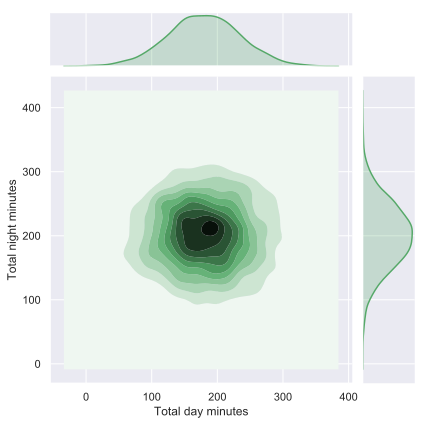

In [25]:
sns.jointplot(x='Total day minutes', y='Total night minutes',
              data=df, kind="kde", color="g");

This is basically a bivariate version of the kernel Density Plot discussed earlier.

__Scatterplot Matrix__

In some cases, we may want to plot a _scatterplot matrix_ such as the one shown below. Its diagonal contains the distribution of the corresponding variables, and the scatter plots for each pair of variables fill the rest of the matrix.

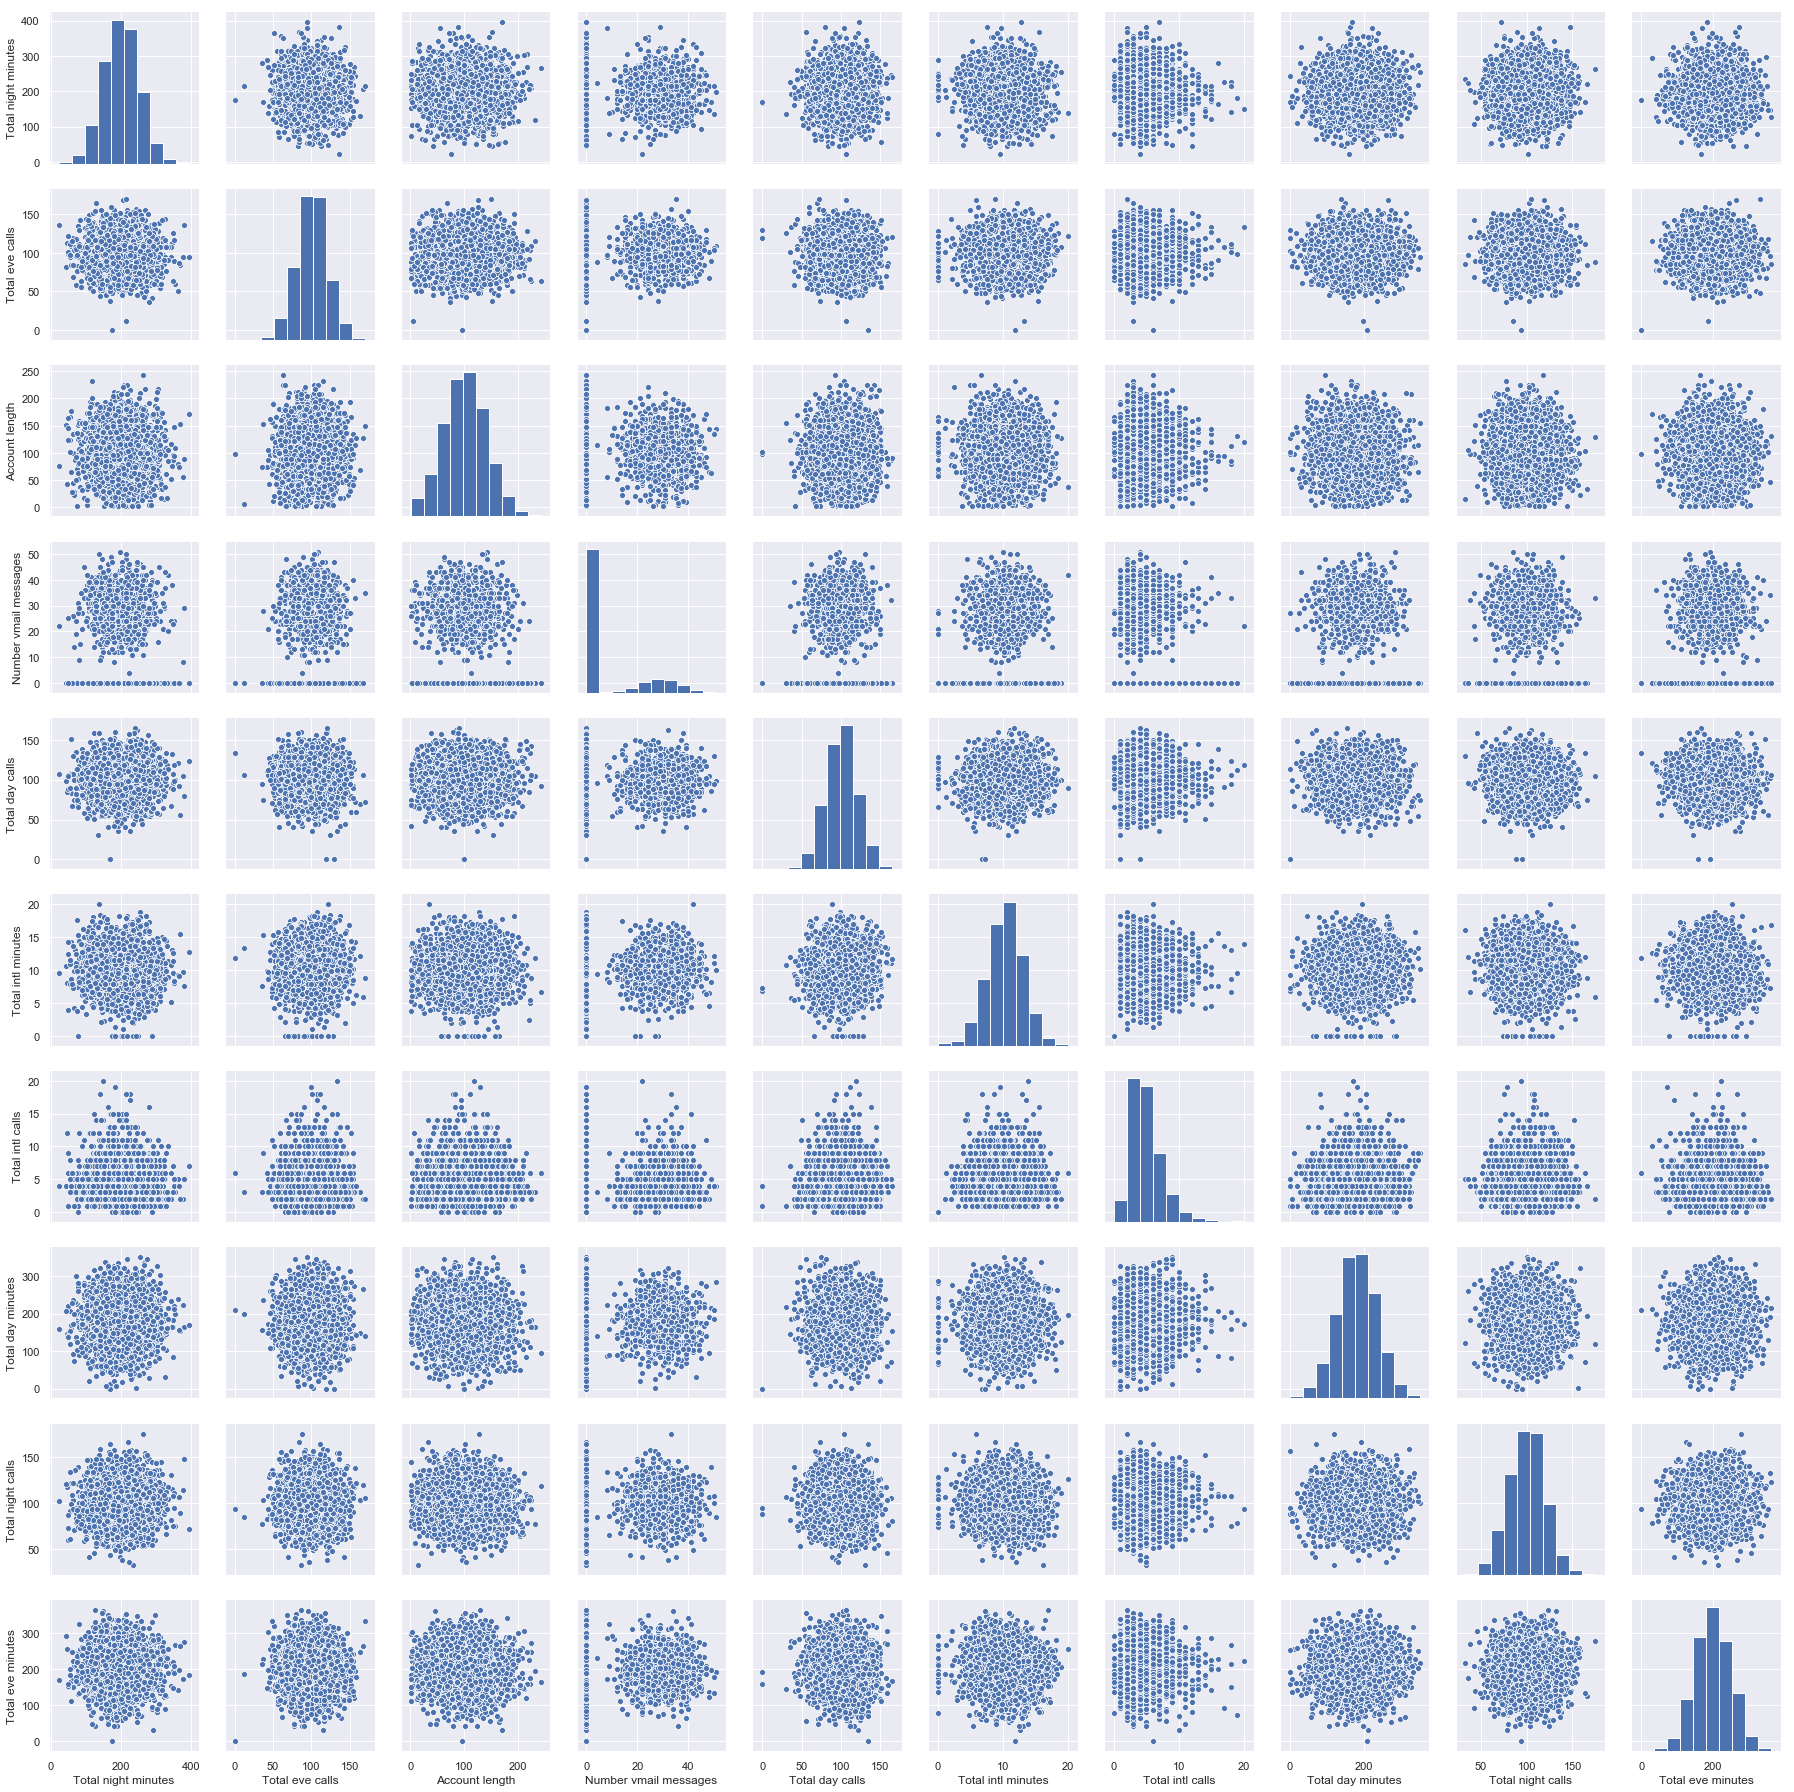

In [26]:
# pairplot() may become slow with the SVG format
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[numerical]);

Sometimes, such visualizations may help draw conclusions about the data; but in this case, everything is pretty clear with no surprise.

__3.2 Quantitative-Categorical__

In this section, we will make our simple quantitative plots a little more exciting. We will try to gain new insights for churn prediction from the interactions between the numerical and categorical features.

More specifically, let's see how the input variables are related to the target vairable Churn.

Perviously, we went over scatter plots. Additionally, their points can be color or size coded so that the values of a third cateogircal variable are also presented in the same figure. We can achieve this with the ```scatter()``` function seen above, but lets try a new function called ```lmplot()``` and use the parameter ```hue``` to indicate our categorical feature of interest:

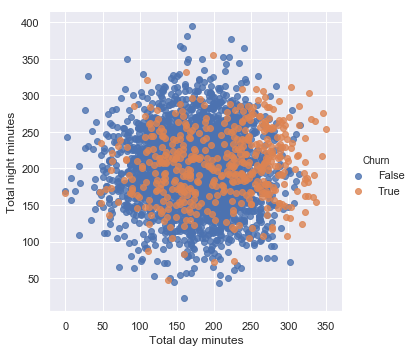

In [27]:
sns.lmplot('Total day minutes', 'Total night minutes', data=df, hue='Churn', fit_reg=False);

It seems that our small proportion of disployal customers lean towards the top right corner; that is, such customers tend to spend more time on the phone during both day and night. But this is not absolutely clear, and won't make any definitive conclusions from this chart.

Now, let's create box plots to visualize the distribution stats of the numerical variables in two disjoint groups: the loyal customer and those who left.

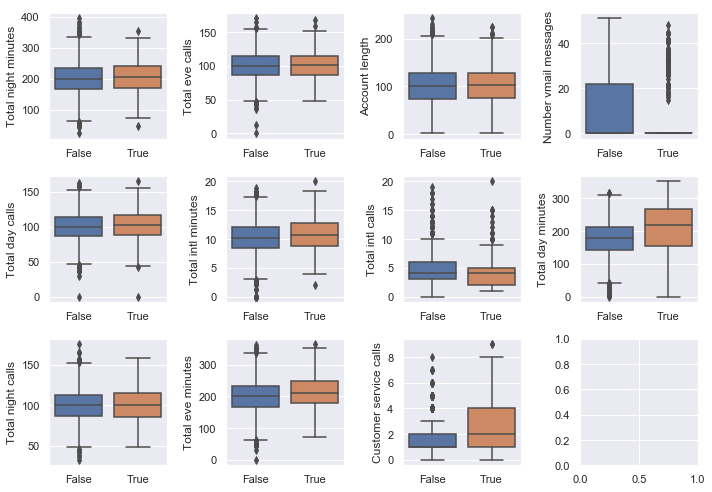

In [28]:
# Sometimes you can analyze an ordinal variable just as numerical ones
numerical.append('Customer service calls')

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7))
for idx, feat in enumerate(numerical):
    ax = axes[int(idx / 4), idx % 4]
    sns.boxplot(x='Churn', y=feat, data=df, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(feat)
fig.tight_layout();

From this chart, we can see that the greatest discrepancy in distribution between the two groups is for three variables: _Total day minutes, Customer service calls, and Number vmail messages_. Later in this course, we will learn the importance in classification using _Random Forest_ or _Gradient Boosting_; there, we will see that the first two features are indeed very important for churn prediction.

Let's look at the distribution of day minutes spoken for the loyal and disployal customers seperately. We will create box and violin plots for _Total day minutes_ grouped by the target variable.

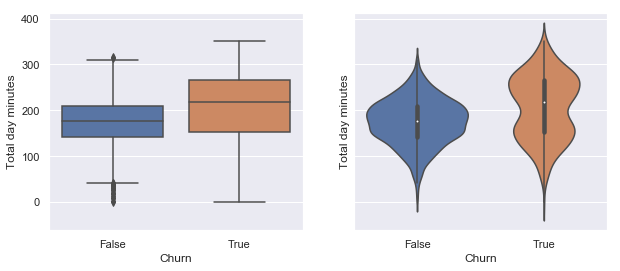

In [30]:
_, axes = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(10, 4))

sns.boxplot(x='Churn', y='Total day minutes', data=df, ax=axes[0]);
sns.violinplot(x='Churn', y='Total day minutes', data=df, ax=axes[1]);

__An interesting observation__: on average, customers that discontinue their contracts are more active users of communication services. Perhaps they are unhappy with the tarrifs, so a possible measure to prevent churn could be reduction to call rates. The company will need to undertake additional economic analysis to find out wether such measures would be beneficial.

When we want to analyze a quantative variable in two categorical dimenstions at once, there is a suitable function for this in the ```seaborn``` library called ```catplot()```. For example, let's visualize the interaction between Total day minutes and two categorical variables in the same plot:

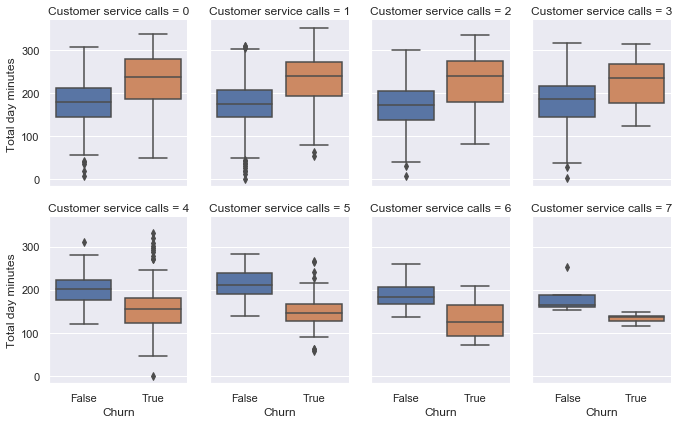

In [32]:
sns.catplot(x='Churn', y='Total day minutes', col='Customer service calls',
               data=df[df['Customer service calls'] < 8], kind="box",
               col_wrap=4, height=3, aspect=.8);

From this, we can conclude that, starting with 4 calls, _Total day minutes_ may no longer be a factor for customer churn. Perhaps, in addition to previous geuss about the tariffs, there are customers that are dissatisfied with the service due to other problems, which might lead to fewer number of day minutes spent on calls.

__3.3 Categorical

Now we are interested in the relationship between the ordinal feature of _Customer service calls_ with our target _Churn_. 

Lets look at the distribution of the number of calls to customer service, again using a count plot. This time, let's alos pass the parameter ```hue=Churn``` that adds a categorical dimenstion to the plot:

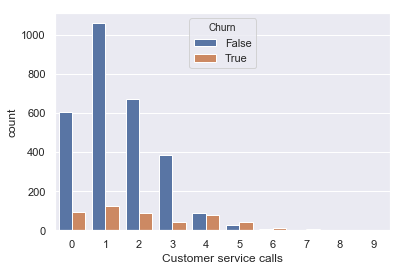

In [33]:
sns.countplot(x='Customer service calls', hue='Churn', data=df);

Now lets look at the relationship between _Churn_ and the bunary features, _International plan_ and _Voice mail plan_.

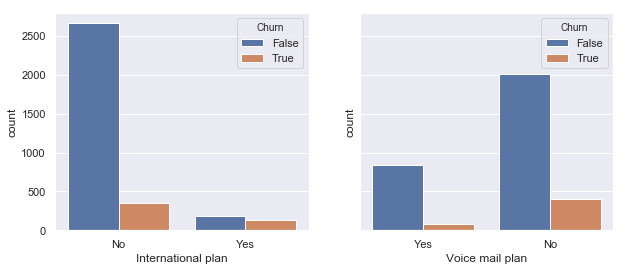

In [34]:
_, axes = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(10, 4))

sns.countplot(x='International plan', hue='Churn', data=df, ax=axes[0]);
sns.countplot(x='Voice mail plan', hue='Churn', data=df, ax=axes[1]);

__Contingency Table__

In addition to using graphical means for categorical analysis, there is a traditional tools from statistics; a _contingency table_, also called a _cross tabulation_. It represents multivariate frequency distributions of categorical variables in tabular form. In particular, it allows us to see the distribution of one variable conditional on the other by looking along a column or row.

Let's try to see how _Churn_ is related to the cateogircal variable _State_ by creating a cross tabulation:

In [35]:
pd.crosstab(df['State'], df['Churn']).T

State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Churn,,,,,,,,,,,,,,,,,,,,,
False,49,72,44,60,25,57,62,49,52,55,...,52,48,54,62,72,65,52,71,96,68
True,3,8,11,4,9,9,12,5,9,8,...,8,5,18,10,5,8,14,7,10,9


Lets calculate the churn rate for each state, sorting it from high to low:

In [38]:
df.groupby(['State'])['Churn'].agg([np.mean]).sort_values(by='mean', ascending=False).T

State,NJ,CA,TX,MD,SC,MI,MS,NV,WA,ME,...,RI,WI,IL,NE,LA,IA,VA,AZ,AK,HI
mean,0.264706,0.264706,0.25,0.242857,0.233333,0.219178,0.215385,0.212121,0.212121,0.209677,...,0.092308,0.089744,0.086207,0.081967,0.078431,0.068182,0.064935,0.0625,0.057692,0.056604


Based on the observations of our dataset alone, it seems that the churn rate in New Jersery and California are above 25% and less than 6% for Hawaii and Alaska.

### 4. Whole dataset

__Dimensionality Reduction__

To look at a dataset as a whole, we need to decrease the number of dimensions used in visualization without losing much information about data. This task is called _dimensionality reduction_ and is an example of an _unsupervised learning_ problem because we need to dervice new, low-dimensional features from the data itself, without any supervised input.

One of the well-known dimensionality reduction methods is _Principal Component Analysis (PCA)_, which we will study later. Its limitatino is that it is a _linear_ algorithm that implies certain restrictions on the data.

There are also many non-linear methods, collectively called _Manifold Learning_. One of the best known of them is _t-SNE_.

__t-SNE__

The name of the method looks complex: _t-distributed Stochastic Neighbor Embedding_. Its math is also impressive. Its basic idea is simple: find a projection for a high-dimensional feature space onto a plane (or a 3D hyperplane, but it is almost always 2D_ such that those points that were far apart in the initial n-dimensional space will end up far apart on the plane. Those that were originally close would remain close to each other.

Essentially, _neighbor embedding_ is a search for a new and less-dimensional data representation that preserves neighborship of examples.

Now, let's do some practice. First, we need to import some additional classes:

In [40]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [41]:
X = df.drop(['Churn', 'State'], axis=1)
X['International plan'] = X['International plan'].map({'Yes': 1, 'No': 0})
X['Voice mail plan'] = X['Voice mail plan'].map({'Yes': 1, 'No': 0})

We also need to normalize the data. For this, we will subtract the mean from each variable and divide it by its standard deviation. All of thi can be done with ```StandardScaler```.

In [42]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/Users/jonaserthal/miniconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/jonaserthal/miniconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Now, let's build a t-SNE representation:

In [49]:
%%time
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_scaled)

CPU times: user 24.2 s, sys: 1.42 s, total: 25.7 s
Wall time: 25.7 s


and plot it:

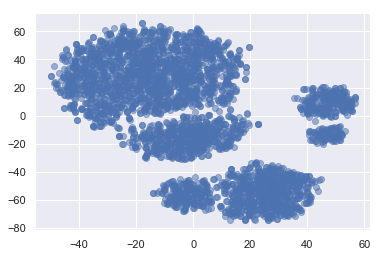

In [50]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], alpha=.5);

Lets color this t-SNE representation according to the churn (blue for loyal customers, and orange for those who churned)

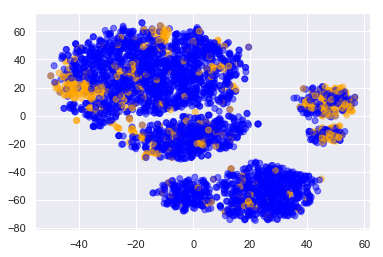

In [51]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1],
               c=df['Churn'].map({False: 'blue', True: 'orange'}), alpha=0.5);

To better understand the pciture, we can also color it with the remaining binary features: International Plan and Voicemail. Orange dots here indicate instances that are positive for the corresponding binary feature.

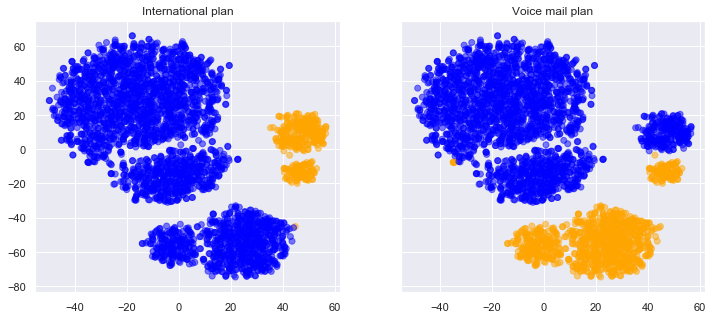

In [52]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 5))

for i, name in enumerate(['International plan', 'Voice mail plan']):
    axes[i].scatter(tsne_repr[:, 0], tsne_repr[:, 1], c=df[name].map({'Yes': 'orange', 'No': 'blue'}), alpha=0.5);
    axes[i].set_title(name);

Occasionally, using t-SNE can give a really good intuition for the data.